## A study of Protein-Protein Correlation 

#### Introduction: 
A protein is expressed as correlation vector with N other proteins. Our attempt is to understand the protein-protein correlation translated to the graph structure. The graph theoritic construct is expected to elevate our understanding of this correlation providing us the information of

- Protein community detection which can work as biomarker pannel
- Centrality of a protein help us to understand the central role among the correlation and ranking of the proteins
- Correlation based model can be implemented to cluster the proteins
- Link prediction technique can be implemented to specific protein-pair to redefine and predict ill defined link or correlation

--------

In [162]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd

In [163]:
import networkx as nx
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import seaborn as sns
sns.set()

------------

### 1. Data Preprocessing

#### 1.1 Accessing Data

This data is obtained in the data file, so there is no need of data download pipeline. A formal data download pipeline downloads the data systematically from data server and checks th integrety of the data by implementing md5-checksum value.

In [164]:
input = np.loadtxt("carma.fitted.dcd.varcov.dat")

In [175]:
'''what is data type of input?'''
print(type(input))

<class 'numpy.ndarray'>


In [179]:
'''what is shape of the data?'''
print(input.shape)

(1677, 1677)


#### 1.2. Data Summary

Creation of dataframe in pandas allows us to implement data exploration functionality

In [174]:
'''creation of data frame'''
DF = pd.DataFrame(input)
'''visualizing 5 row and 5 column'''
DF.loc[0:5,0:5]

,0,1,2,3,4,5
0,1.00000,0.85988,0.74593,0.67615,0.67352,0.60763
1,0.85988,1.00000,0.85374,0.73929,0.79251,0.77149
2,0.74593,0.85374,1.00000,0.87656,0.75699,0.80983
3,0.67615,0.73929,0.87656,1.00000,0.87735,0.82137
4,0.67352,0.79251,0.75699,0.87735,1.00000,0.89364
5,0.60763,0.77149,0.80983,0.82137,0.89364,1.00000


In [228]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Columns: 1677 entries, 0 to 1676
dtypes: float64(1677)
memory usage: 21.5 MB


```pd.describe()``` allows us to calculate statistical summary of the dataframe (column by column)

In [178]:
DF.describe()

,0,1,2,3,4,5,6,7,8,9,...,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,0.000513,-0.000464,0.002985,0.003988,0.000874,0.001751,0.004906,0.003530,0.000393,0.003689,...,0.000365,0.000181,0.000785,0.001348,0.000625,-0.000034,0.000632,0.002124,0.000835,-0.000518
std,0.135391,0.143269,0.153575,0.164029,0.164740,0.156181,0.161278,0.169833,0.154445,0.150388,...,0.159397,0.161735,0.157346,0.152002,0.151768,0.148763,0.144939,0.141259,0.132534,0.118893
min,-0.300250,-0.321360,-0.361740,-0.382500,-0.407740,-0.352420,-0.400040,-0.471320,-0.373980,-0.354010,...,-0.322540,-0.305000,-0.312550,-0.313510,-0.288510,-0.320810,-0.340070,-0.311890,-0.329470,-0.324360
25%,-0.091070,-0.095070,-0.106290,-0.107030,-0.103210,-0.102440,-0.103080,-0.110970,-0.100320,-0.100430,...,-0.105310,-0.108120,-0.102590,-0.099660,-0.096880,-0.093790,-0.090120,-0.093080,-0.084990,-0.080070
50%,-0.014100,-0.010460,-0.010800,-0.004220,-0.006650,-0.007830,0.003700,0.007050,-0.007850,-0.000740,...,-0.023070,-0.022800,-0.017380,-0.019530,-0.023080,-0.024340,-0.020920,-0.006230,0.000990,-0.005250
75%,0.068240,0.073740,0.094020,0.093700,0.088800,0.088230,0.089430,0.097760,0.088070,0.087240,...,0.079810,0.080670,0.077240,0.086390,0.082610,0.077530,0.082070,0.087270,0.082170,0.066440
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Individual statistical quantities can be calculated

In [188]:
'what are mean and std deviations?'
input.mean(), input.std()

(0.0015731197736822409, 0.1531842741714529)

---------------------

### 2. Data Exploration

#### 2.1 Heat map visualization
 Heatmap visualization presents the correlation data in terms of color coding for positive and negative correlation. The dark bands are representing the positive correlations.

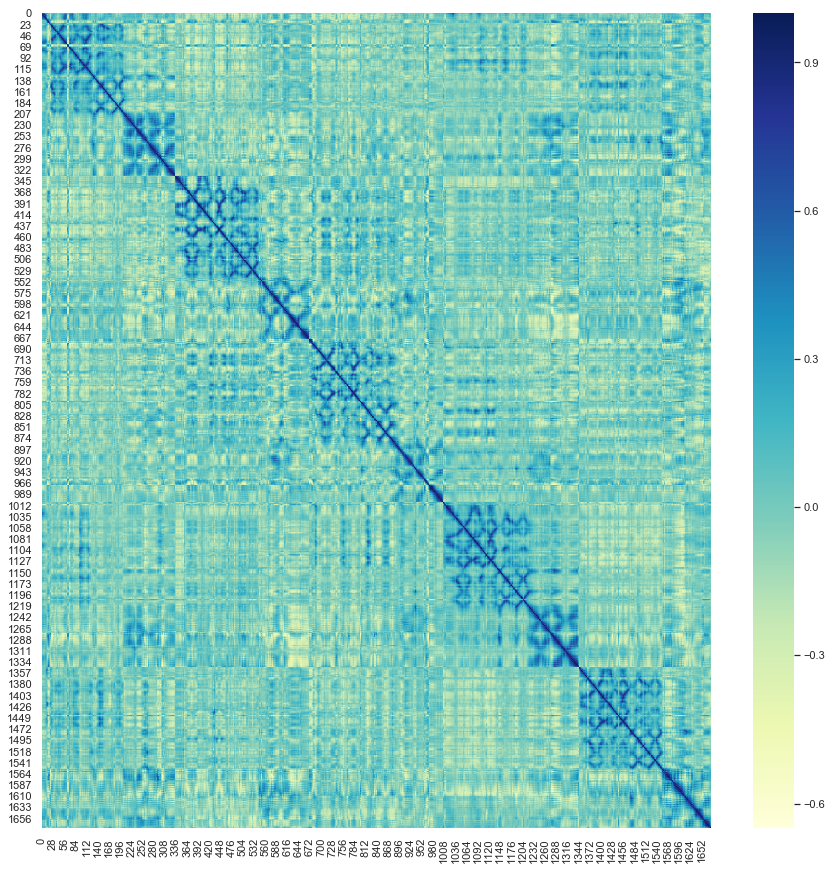

In [191]:
plt.figure(figsize = [15,15])
sns.heatmap(DF, cmap="YlGnBu")
plt.savefig('heatmap.png')

### 3. Analysis

#### 3.1 Apply lower cutoff

In [207]:
cutoff = 0.5

#### 3.2. Take test data ( submatrix)

In [136]:
N =100
submatrix = input[0:N,0:N]
for i in range(N):
    for j in range(N):
        if submatrix[i,j]<cutoff:
            submatrix[i,j] = 0

In [137]:
submatrix[0:5,0:5]

array([[1.     , 0.85988, 0.74593, 0.67615, 0.67352],
       [0.85988, 1.     , 0.85374, 0.73929, 0.79251],
       [0.74593, 0.85374, 1.     , 0.87656, 0.75699],
       [0.67615, 0.73929, 0.87656, 1.     , 0.87735],
       [0.67352, 0.79251, 0.75699, 0.87735, 1.     ]])

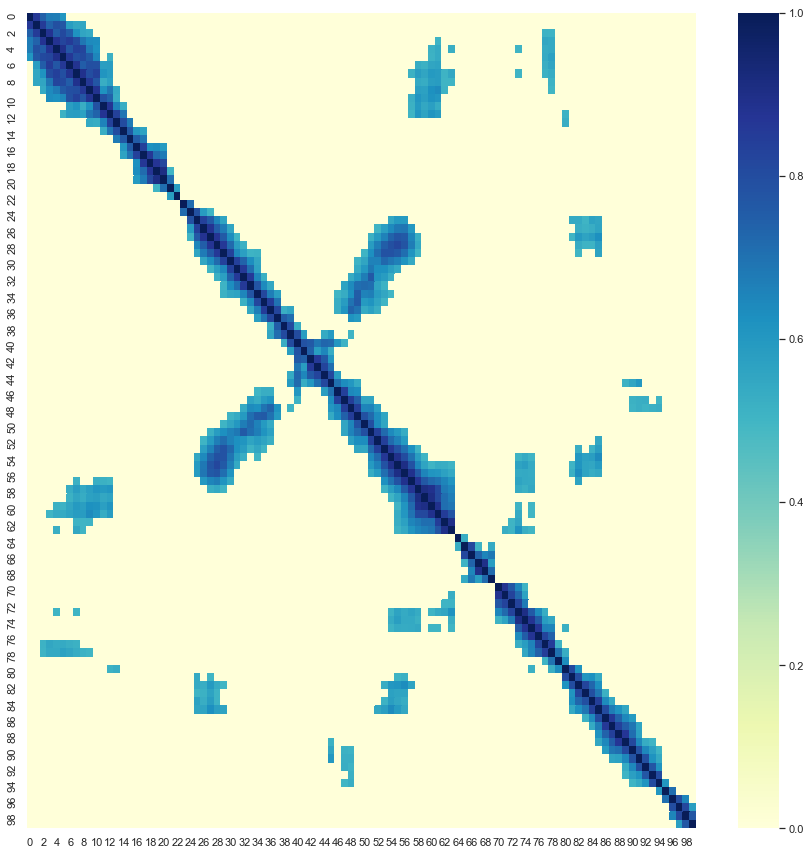

In [192]:
plt.figure(figsize = [15,15])
sns.heatmap(submatrix, cmap="YlGnBu")
plt.savefig('submatrix.png')

#### 3.4  Network Creation

Create the network form weight matrix 'submatrix'

In [209]:
G = nx.from_numpy_matrix(submatrix, create_using=nx.MultiGraph)

Summary of the network

In [225]:
print(nx.info(G))

Name: 
Type: MultiGraph
Number of nodes: 100
Number of edges: 652
Average degree:  13.0400


##### 3.4.1. Network Plot

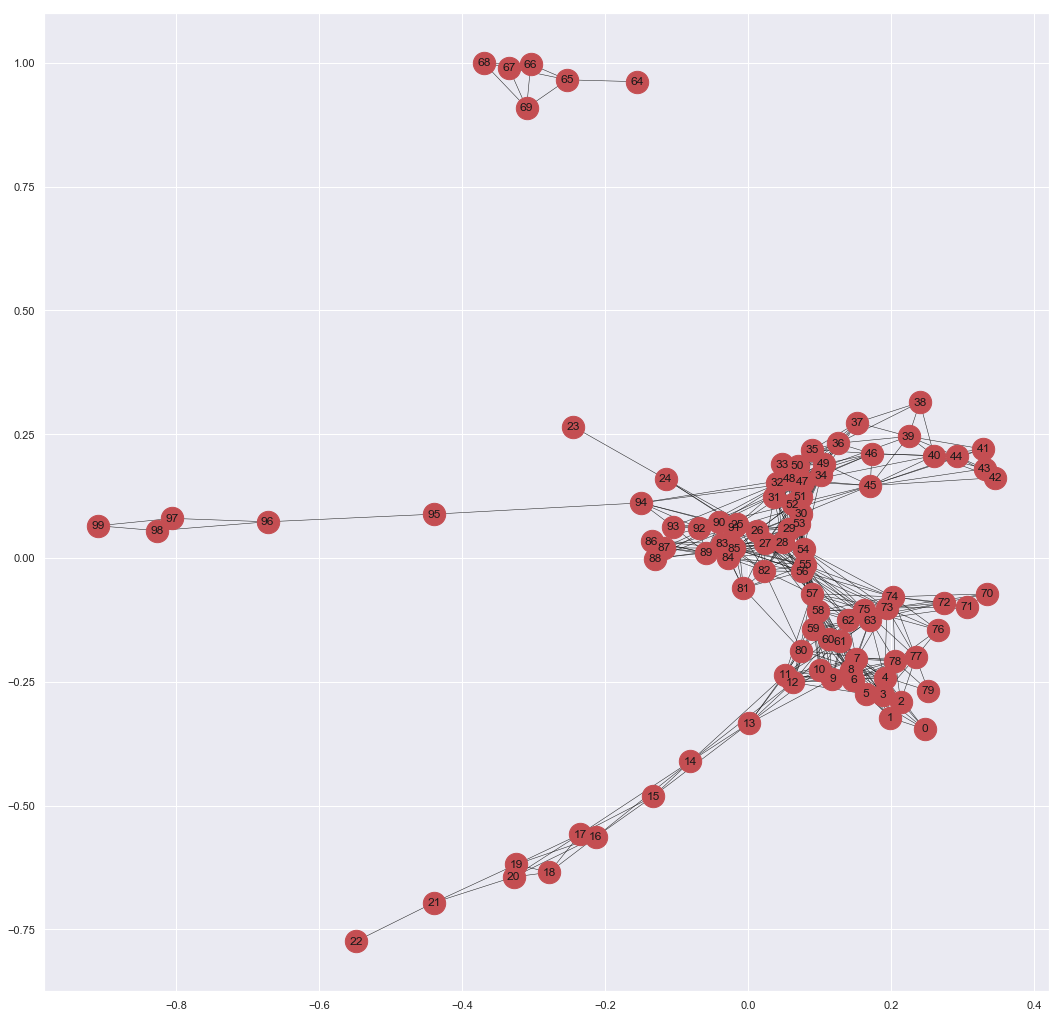

In [210]:
plt.figure(figsize=(18, 18))
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos,\
                       nodelist=[0,1,2,3,4,5],\
                       width = 0.5,\
                       alpha=1.0)

nx.draw_networkx_nodes(G, pos,\
                       node_size=500,
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,\
                        with_labels=True)

plt.savefig("network_"+str(cutoff) + ".png")
plt.show()


#### 3.5 Network Analysis

##### 3.5.1 Degree and neighbourhood

In [211]:
'''How many proteins are strongly correlated to a single protein?'''
nx.degree(G)

MultiDegreeView({0: 7, 1: 10, 2: 13, 3: 15, 4: 18, 5: 17, 6: 19, 7: 23, 8: 20, 9: 19, 10: 17, 11: 15, 12: 17, 13: 9, 14: 8, 15: 6, 16: 8, 17: 8, 18: 6, 19: 7, 20: 7, 21: 5, 22: 3, 23: 3, 24: 6, 25: 15, 26: 18, 27: 22, 28: 21, 29: 22, 30: 19, 31: 16, 32: 16, 33: 16, 34: 19, 35: 15, 36: 15, 37: 9, 38: 6, 39: 10, 40: 11, 41: 8, 42: 7, 43: 7, 44: 9, 45: 15, 46: 11, 47: 17, 48: 21, 49: 18, 50: 16, 51: 21, 52: 22, 53: 24, 54: 26, 55: 29, 56: 28, 57: 25, 58: 25, 59: 18, 60: 21, 61: 22, 62: 15, 63: 18, 64: 3, 65: 6, 66: 6, 67: 6, 68: 5, 69: 6, 70: 6, 71: 7, 72: 8, 73: 20, 74: 16, 75: 16, 76: 7, 77: 14, 78: 16, 79: 5, 80: 9, 81: 11, 82: 17, 83: 14, 84: 16, 85: 20, 86: 9, 87: 9, 88: 8, 89: 11, 90: 13, 91: 12, 92: 9, 93: 8, 94: 9, 95: 4, 96: 5, 97: 5, 98: 5, 99: 4})

In [221]:
'''what is the maximum degree?'''
max(list(dict(nx.degree(G)).values()))

29

In [224]:
'''which protein has the highest degree?'''
list(dict(nx.degree(G)).values()).index(29)

55

Write all neighbours for the individual proteins to a file 'protein-neighbours.txt'

In [227]:
with open("protein-neighbours.txt",'w') as f:
    for node in G.nodes():
        f.write(str(node) + "|" + str([n for n in G.neighbors(node)]))
        f.write("\n")

### 4. Model Development

#### 4.1 Hierarchical Clustering

please see reference.....to be continued!

#### 4.2 Affinity Propagation

please see reference.... to be continued!

### References

1. Network Tutorial: https://nbviewer.jupyter.org/github/npdatax/learn-networkx/tree/master/
2. Machine Learning Affinity propagation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html
3. Hierarchical clustering: https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html